# 분류(classification)의 기초

분류(classification)는 독립 변수 혹은 feature가 주어졌을 때 가장 연관성이 큰 종속변수 카테고리(클래스)를 계산하는 문제이다. 현실적인 문제로 바꾸어 말하면 어떤 표본에 대한 데이터가 주어졌을 때 그 표본이 어떤 카테고리 혹은 클래스에 속하는지를 알아내는 문제이기도 하다. 선택해야 할 카테고리 혹은 클래스가 미리 주어졌다는 점에서 보기가 주어진 객관식 시험 문제를 푸는 것과 비슷하다고 말할 수 있다.


## 분류 문제를 푸는 방법

분류 문제를 푸는 방법은 크게 두 가지로 나눌 수 있다. 하나는 주어진 데이터에 대해(conditionally) 각 카테고리 혹은 클래스가 정답일 확률(conditional probability)를 계산하는 방법이고 또 다른 하나는 카테고리를 나누는 경계면으로부터 상대적으로 어떤 위치에 있는 지를 나타내는 판별 함수(discriminant function)를 계산하는 방법이다.

1. 조건부 확률(conditional probability) 기반
  * 1-1 조건부 확률 기반 판별(discriminative) 모형
  * 1-2 조건부 확률 기반 생성(generative) 모형
2. 판별 함수(discriminant function) 기반

## 분류 모형의 종류

| 모형 | 방법론 | 
|-|-|
| Linear/Quadratic Discriminant Analysis  | 조건부 확률 기반 생성(generative) 모형 |
| Naive Bayes | 조건부 확률 기반 생성(generative) 모형 |
| Logistic Regression | 조건부 확률 기반 판별(discriminative) 모형 |
| Decision Tree | 조건부 확률 기반 판별(discriminative) 모형 |
| K Nearest Neighbor | 조건부 확률 기반 판별(discriminative) 모형 |
| Perceptron | 판별 함수(discriminant function) 기반 모형 |
| Support Vector Machine | 판별 함수(discriminant function) 기반 모형 |
| Neural Network (Deep Learning) | 판별 함수(discriminant function) 기반 모형 |



* Decision Tree, K Nearest Neighbor
 * 아주 직관적인 방식이다. 집값이 한강변에 접했느냐 아니냐에 따라 다르다.
 * 층수, 복층 등의 룰을 세분화해서 적용하다보면 집값이 정해지는 방식이 Decision Tree방식
 * K Nearest Neighbor는 100만호에 대한 집값 정보를 모아서 누군가 새로운 집을 보여주면서 이 집의 가격을 예측해달라고 하면 그 집이랑 제일 비슷한 독립변수 K개를 모아서 다수결로 뽑아내서 예측하는 방법
* Perceptron, Support Vector Machine, Neural Network (Deep Learning)
 * 이것들은 경계선을 만든다. discriminant function이라는 함수가 그 경계선의 기준을 알려준다. 

## 조건부 확률 방법

출력 $y$ 는 클래스 $C_1, \cdots, C_K$ 중의 하나의 값을 가진다고 가정하자. 조건부 확률 방법은 출력 $y$ 가 이 각각의 클래스 값일 확률을 모두 계산해서 그 중 확률이 큰 클래스를 선택하는 방법이다. 물론 확률은 가지고 있는 모든 데이터에 의존하는 조건부 확률이어야 한다.

$$
\begin{eqnarray}
P_1 &=& P(y=C_1 \mid x_{1:N}, y_{1:N}, x_{N+1} ) \\
\vdots & & \vdots \\
P_K &=& P(y=C_K \mid x_{1:N}, y_{1:N}, x_{N+1} )\\
\end{eqnarray}
$$

Scikit-Learn 에서 조건부 확률을 사용하는 분류 모형들은 모두 `predict_proba` 메서드와 `predict_log_proba` 메서드를 지원한다. 이 메서드들은 독립 변수 $x$가 주어지면 종속 변수 $y$의 모든 카테고리 값에 대해 조건부 확률 또는 조건부 확률의 로그값을 계산한다. 

(가짜 확률을 만드는 이유? 나중에 배울 앙상블과 관련되어 있음(pass))

### QDA (Quadratic Discriminant Analysis)

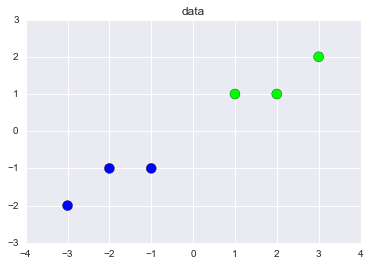

In [19]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.title("data")
plt.show()

In [20]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis().fit(X, y)

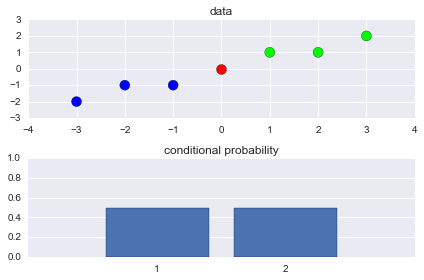

In [21]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align='center')
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

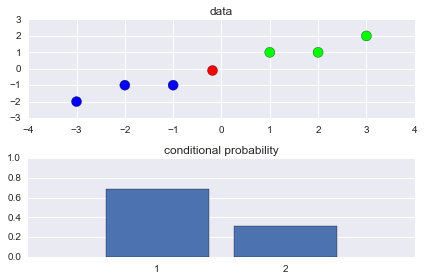

In [23]:
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align="center")
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

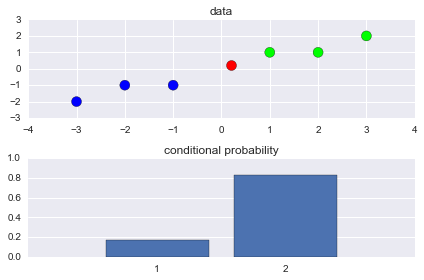

In [24]:
x = [[0.2, 0.2]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X.T[0], X.T[1], c=y, s=100, cmap=mpl.cm.brg)
plt.scatter(x[0][0], x[0][1], c='r', s=100)
plt.title("data")
plt.subplot(212)
plt.bar(model.classes_, p, align="center")
plt.title("conditional probability")
plt.axis([0, 3, 0, 1])
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.tight_layout()
plt.show()

### 나이브 베이지안 (Naive Bayesian) 모형

In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [26]:
news = fetch_20newsgroups(subset='all')
model = Pipeline([
        ('vect', TfidfVectorizer(stop_words='english')),
        ('nb', MultinomialNB()),
    ])
model.fit(news.data, news.target)

Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
  ...True,
        vocabulary=None)), ('nb', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [27]:
x = news.data[:1]
y = model.predict(x)[0]
print(x[0])
print("=" * 80)
print("Actual Category:", news.target_names[news.target[0]])
print("Predicted Category:", news.target_names[y])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


Actual Category: rec.sport.hockey
Predicted Category: rec.sport.hockey


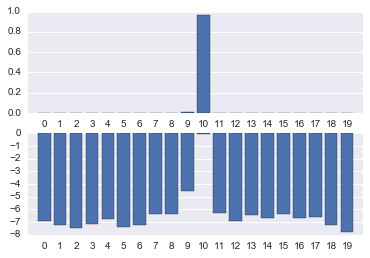

In [28]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0], align='center')
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0], align='center')
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.show()

조건부 확률을 추정하는 방법도 크게 판별 모형(Discriminative Model)과 생성 모형(Generative  Model)으로 나누어진다.

## 조건부 확률 추정 방법 1 - 판별 모형 Discriminative Models

판별 모형(Discriminative Models)은 조건부 확률 $p(y \mid x)$ 이 몇 개의 모수(parametric)를 가지는 함수 형태로 표시될 수 있다고 가정하고 모수를 추정하는 방법이다. 카테고리에 따른 독립 변수의 분포인 우도(likelihood) $p(x \mid y)$ 를 알 필요가 없다.


로지스틱 회귀 모형(Logistic Regression)이나 의사 결정 나무(Decision Tree)는 판별 모형에 속한다.

### 로지스틱 회귀 모형

In [29]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

In [30]:
X0, y = make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
sigm = 1.0/(1+np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

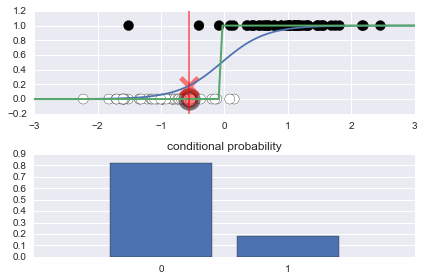

In [31]:
plt.subplot(211)
plt.plot(xx, sigm)
plt.scatter(X0, y, marker='o', c=y, s=100)
plt.scatter(X0[0], model.predict(X0[:1]), marker='o', s=300, c='r', lw=5, alpha=0.5)
plt.plot(xx, model.predict(xx[:, np.newaxis]) > 0.5, lw=2)
plt.scatter(X0[0], model.predict_proba(X0[:1])[0][1], marker='x', s=300, c='r', lw=5, alpha=0.5)
plt.axvline(X0[0], c='r', lw=2, alpha=0.5)
plt.xlim(-3, 3)
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(X0[:1])[0], align="center")
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.title("conditional probability")
plt.tight_layout()
plt.show()

파란색 선이 1일 확률인데 밑에가 1일 확률의 높이이고 위에가 0일 확률의 높이다.

### 의사 결정 나무

In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split

In [33]:
iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

In [34]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0).fit(X_train, y_train)

In [35]:
test_idx=range(105,150)
resolution=0.01
markers = ('s', 'x', 'o', '^', 'v')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y_combined))])

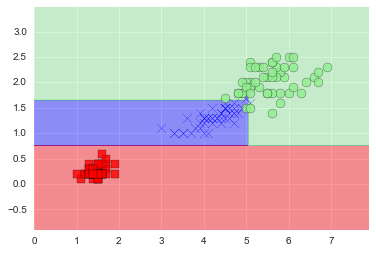

In [37]:
x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
Z = tree.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)

decision tree에서는 pdf가 부드럽지 않고 각이 졌다. decision tree에서는 중간이 없다. 무조건 경계선 기준으로 자른다.

## 조건부 확률 추정 방법 2 - 생성 모형 Generative Models

조건부 확률을 추정하는 두번째 방법은 베이지안 규칙을 사용하여 결합 확률 $p(x,y)$ 또는 우도(likelihood) $p(x \mid y)$에서 최종 조건부 확률 $p(y \mid x)$을 계산하는 것이다. 이 방법은 생성 모형(Generative Models)이라고 한다.
  
$$ p(y \mid x) = \dfrac{p(x,y)}{p(x)} = \dfrac{p(x \mid y)p(y)}{p(x)}$$
  
사전 확률 $p(y)$는 전체 확률의 법칙(Law of total probability)에서 계산할 수 있다.

$$ p(x) = \int p(x,y) dy = \int p(x \mid y)p(y) $$

$$ p(x) = \sum_{k=1}^K p(x,y_k) = \sum_{k=1}^K p(x \mid y_k) p(y_k) $$





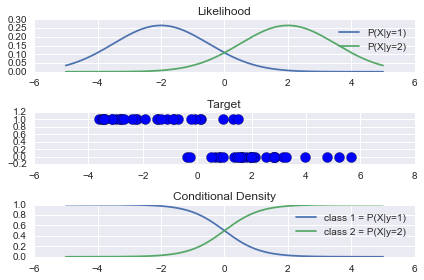

In [2]:
rv1 = sp.stats.norm(-2,1.5); 
rv2 = sp.stats.norm(2,1.5);

N = 30
x1 = rv1.rvs(N) 
x2 = rv2.rvs(N)
x = np.c_[x1, x2]   #c_ column 스택방식
y = np.c_[np.ones(N), np.zeros(N)]
idx = np.random.shuffle([i for i in range(N)])
x = x[idx]
y = y[idx]

xx = np.linspace(-5,5,1000)
marginal = 0.5 * rv1.pdf(xx) + 0.5 * rv2.pdf(xx)    #여기 나온 3줄이 중요하다.
cond1 = 0.5 * rv1.pdf(xx)/marginal
cond2 = 0.5 * rv2.pdf(xx)/marginal

plt.subplot(311)
plt.plot(xx, rv1.pdf(xx), label="P(X|y=1)")
plt.plot(xx, rv2.pdf(xx), label="P(X|y=2)")
plt.title("Likelihood")
plt.legend()

plt.subplot(312)
plt.scatter(x, y, s=100)
plt.title("Target")

plt.subplot(313)
plt.plot(xx, cond1, label="class 1 = P(X|y=1)")
plt.plot(xx, cond2, label="class 2 = P(X|y=2)")
plt.title("Conditional Density")
plt.legend()

plt.tight_layout()
plt.show()

* Likelihood 그림에서 파란선은 P(X|y=1), 초록선은 P(X|y=2)
* class1은 y값이 1이고 class2는 y값이 0이다.

## 분별 함수(Discriminant Function) 기반 모형

또 다른 분류 방법은 동일한 클래스가 모여 있는 영역과 그 영역을 나누는 경계면(boundary plane)을 정의하는 것이다.
이 경계면은 경계면으로부터의 거리를 계산하는 $f(x)$ 형태의 함수인 분별 함수(Discriminant Function)로 정의된다. 

$$ \text{boundary plane}: \;\; f(x) = 0 $$

$$ \text{class 1}: \;\; f(x) > 0 $$

$$ \text{class 0}: \;\; f(x) < 0 $$

Scikit-Learn 에서 분별 함수 기반의 모형은 분별 함수 값을 출력하는 `decision_function` 메서드를 제공한다.

* boundary plane: f(x)=0   =>  이 식으로 선을 나타낸다.
* plane은 2차원 상에서는 선이고 1차원에서는 기준점이고 3차원 이상에서는 면
* 그래서 기본적으로 클래스가 2개인 경우 밖에 사용하지 못한다. 왜냐하면 부호로만 보기 때문에. 기본적으로는 by class인 경우만 풀 수 있다. 쓸려면 변형해야 한다. 부호는 바로 선에부터의 거리를 나타낸다. 

### 퍼셉트론(Perceptron)

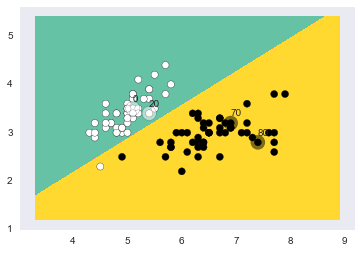

In [54]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(n_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min = X[:, 0].min() - 1; XX_max = X[:, 0].max() + 1;
YY_min = X[:, 1].min() - 1; YY_max = X[:, 1].max() + 1;
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000), np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
plt.contourf(XX, YY, ZZ, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
idx = [0, 20, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c=y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15))
plt.grid(False)
plt.show()

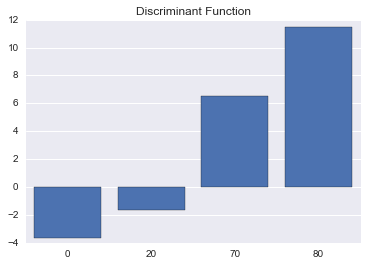

In [55]:
plt.bar(range(len(idx)), model.decision_function(X[idx]), align="center")
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()

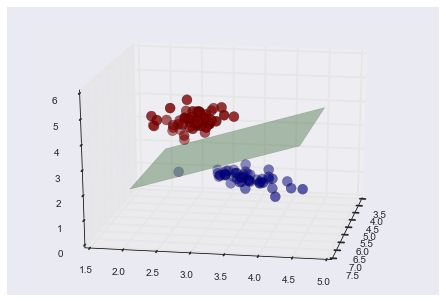

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet);
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3);

### 커널 SVM (Kernel Support Vector Machine)

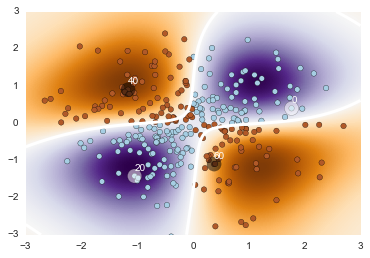

In [57]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3, linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.show()

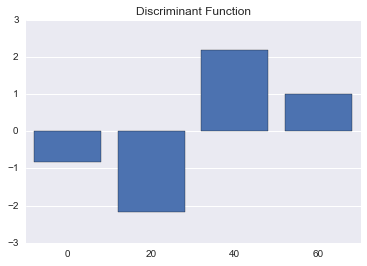

In [58]:
plt.bar(range(len(idx)), model.decision_function(X[idx]), align="center")
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("Discriminant Function")
plt.show()